# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

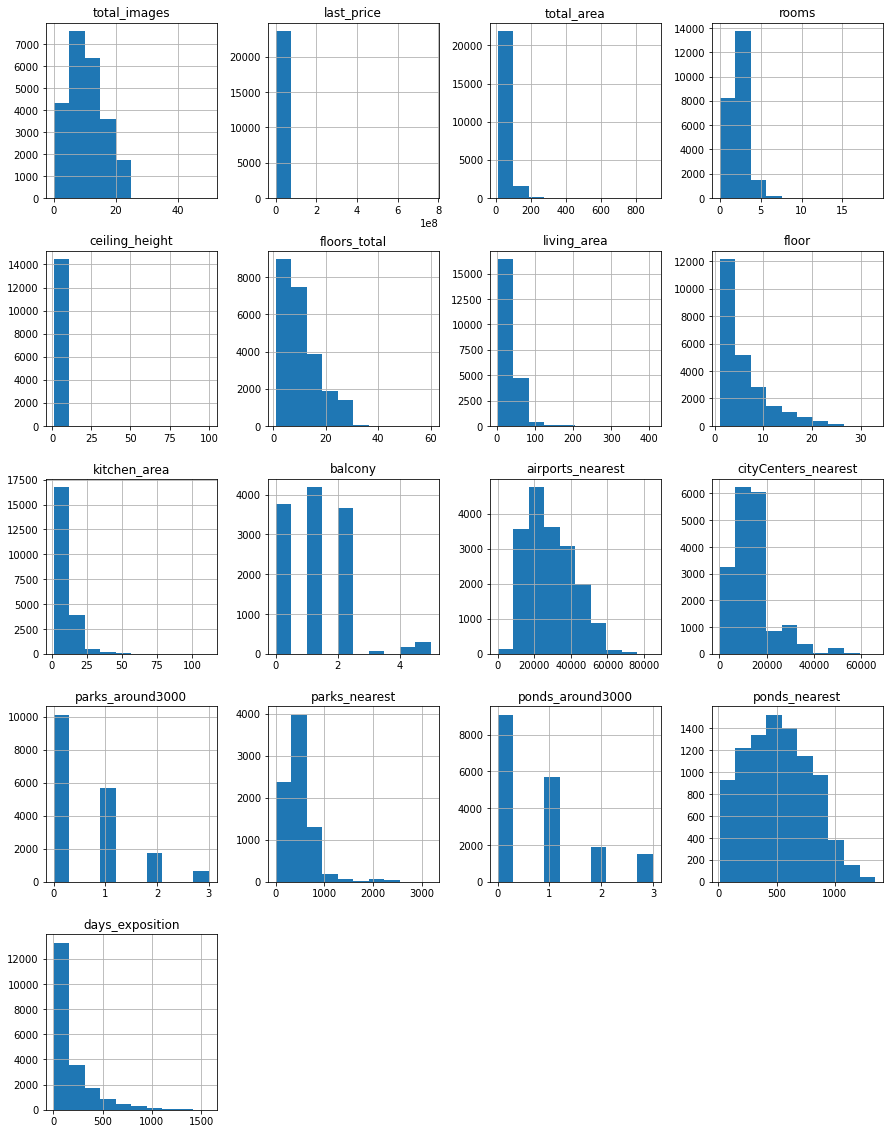

In [ ]:
data.hist(figsize=(15, 20))
plt.show()

Дата сет состоит из 22 столбцов, содержит 23699 записи. В некоторых столбцах притусвует некорректный тип данных стоблцах и пропущенные значения.


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> загрузка и обзор данных проведены корректно

### Выполните предобработку данных

In [ ]:
#анализ пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

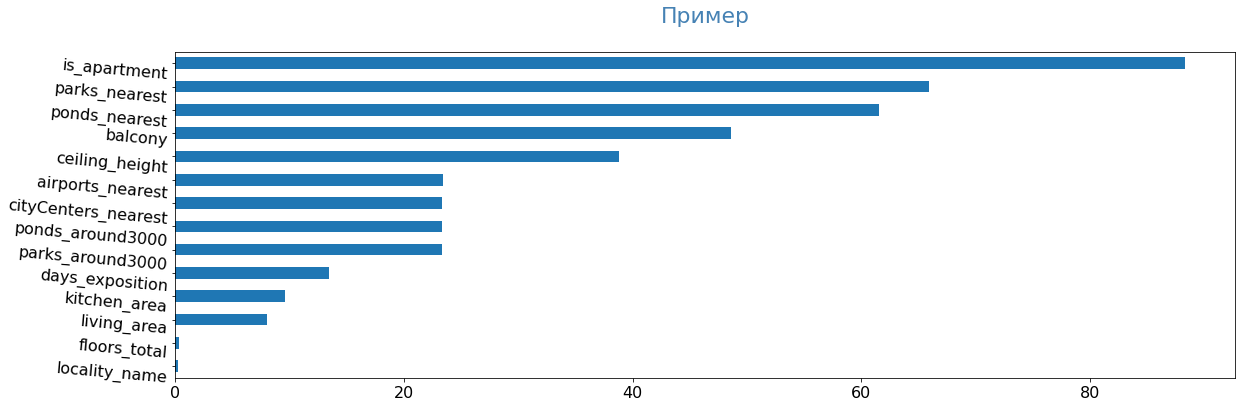

In [ ]:
pass_value_barh(data)


        Можно было бы добавить проценты пропущенных для каждого толбца.

In [ ]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
# приведение к нижнему регистру 
data = data.rename(columns={'cityCenters_nearest': 'cityсenters_nearest'})

In [ ]:
# Заполним пропущенные значения и тип данных 
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)

In [ ]:
# Заполним пропущенные значения и изменим тип данных на целочисленный
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [ ]:
#преобразование столбца с помощбю формата DateTime.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [ ]:
# Заполним пропущенные значения
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
#изменим тип данных на целочислоенный
data['last_price'] = data['last_price'].astype(int)

In [ ]:
#изменим тип данных на целочисленный
data['days_exposition'] = data['days_exposition'].astype(int)

In [ ]:
# Приводим к целочисленному типу и заполянем пропуски
data['floors_total'] = data['floors_total'].fillna(False).astype(int)


In [ ]:
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data['floor']

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />После заполнения синтетическими данными, стоит провести проверку на корректность значений по условию (этажность дома не м.б. ниже этажности квартиры)

    ... ['floors_total'] < ['floor']

In [ ]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [ ]:
# Заполненим пропущенные  значения медианой для высоты потолоков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [ ]:
# Обработка аномальных значений в ceiling_height
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
# Устранение неявных дубликатов в столбце с названиями населенных пунктов
# Приведем все значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('поселок городского типа', 'городской поселок')
    .str.replace('коттеджный поселок', 'городской поселок')
)

In [ ]:
 data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'городской поселок красный бор', 'гатчина', 'деревня федоровское',
       'выборг', 'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'городской поселок лебяжье',
       'городской поселок сиверский', 'поселок молодцово',
       'городской поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'городской поселок ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 

#### check name

In [ ]:
# check
data.locality_name.nunique()

323

In [ ]:
# Заполним пропущенные значения и изменим тип данных на целочисленный
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype(int)

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityсenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### Добавьте в таблицу новые столбцы со следующими параметрами:

In [ ]:
#Цена одного квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

In [ ]:
#день,месяц, год публикации
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


In [ ]:

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
data['floor_type'] = data.apply(floor_type, axis=1)
data['cityсenters_nearest_km'] = (data['cityсenters_nearest'] / 1000).round().astype('Int64')

In [ ]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityсenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sqm', 'day_of_week',
       'month', 'year', 'floor_type', 'cityсenters_nearest_km'],
      dtype='object')

### Проведите исследовательский анализ данных

#### Изучение данных и построение отдельных гистограммы для каждого параметра:общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка 

In [ ]:
#изучим общую площаль
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

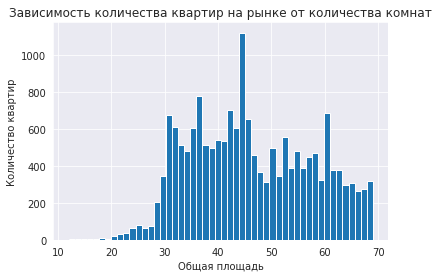

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['total_area'], bins=50, range=(12,69))
plt.title('Зависимость количества квартир на рынке от количества комнат')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим жилую этажей
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

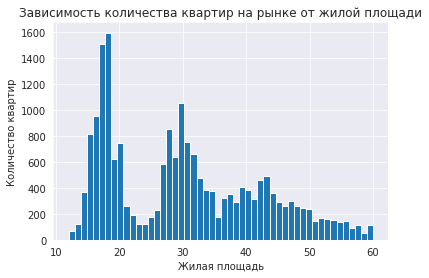

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['living_area'], bins=50, range=(12,60))
plt.title('Зависимость количества квартир на рынке от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим площадь кухни
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

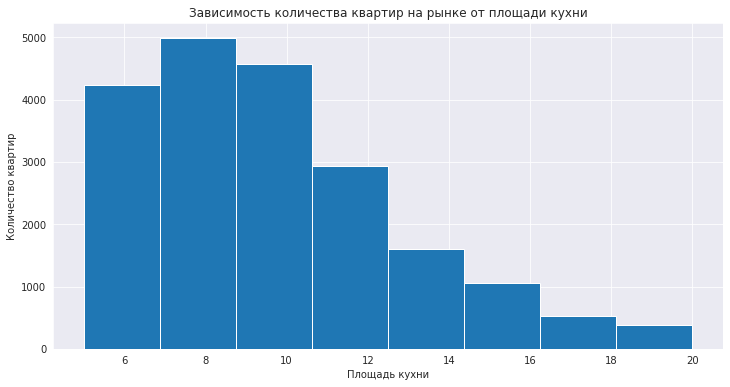

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.hist(data['kitchen_area'], bins=8, range=(5,20))
plt.title('Зависимость количества квартир на рынке от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим цену объекта
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
data.query("last_price>10000000").head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,day_of_week,month,year,floor_type,cityсenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2.0,755.0,0,120370.37,3,3,2019,другой,16
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84,3.0,234.0,424,408176.10,4,7,2015,другой,7
19,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,False,...,0,0.0,NaN,97,117355.37,2,1,2019,другой,13
35,6,15500000,149.0,2017-06-26,5,2.65,5,104.0,4,False,...,0,1.0,779.0,644,104026.85,0,6,2017,другой,4
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.9,2,False,...,47,1.0,907.0,987,135970.33,2,7,2015,другой,31
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,False,...,0,3.0,99.0,541,279503.11,1,10,2017,другой,7
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,526,0.0,NaN,0,86727.94,4,9,2017,последний,7
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,648,1.0,779.0,37,169491.53,1,9,2018,другой,5
81,9,10949000,68.0,2018-12-27,1,2.65,10,NaN,6,False,...,0,NaN,NaN,0,161014.71,3,12,2018,другой,<NA>
98,11,11700000,80.0,2014-12-10,3,2.65,5,55.1,3,False,...,666,0.0,NaN,831,146250.00,2,12,2014,другой,9


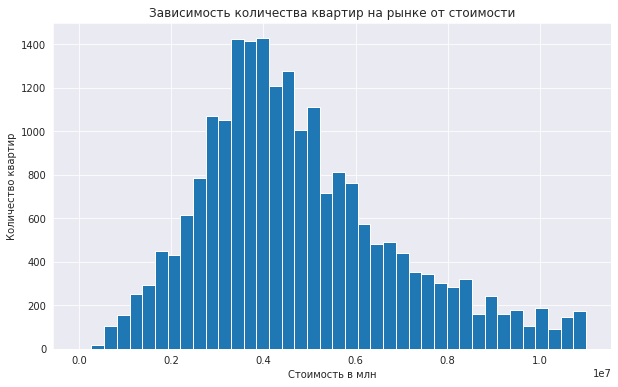

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.hist(data['last_price'], bins=40, range=(0, 11000000))
plt.title('Зависимость количества квартир на рынке от стоимости')
plt.xlabel('Стоимость в млн')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим количество комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

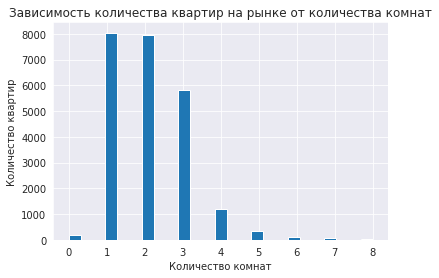

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['rooms'], bins=25, range=(0,8))
plt.title('Зависимость количества квартир на рынке от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />  Стоит изменить параметры отображения гистограммы (добавить кол-во корзин), сейчас трудно определить типовое кол-во комнат
        
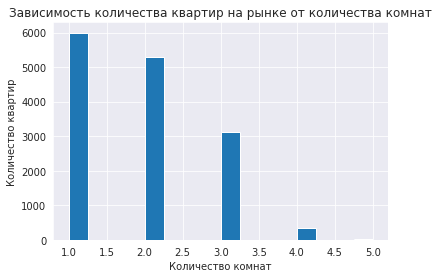        

In [ ]:
#изучим высоту потолков
data['ceiling_height'].describe()

count    23699.000000
mean         2.699480
std          0.276991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

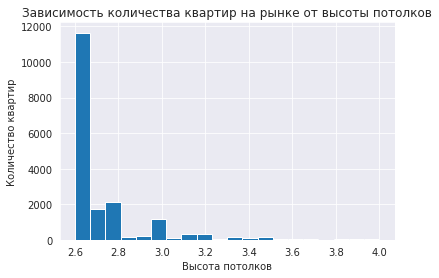

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['ceiling_height'], bins=20, range=(2.600000,4))
plt.title('Зависимость количества квартир на рынке от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим количество этажей
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

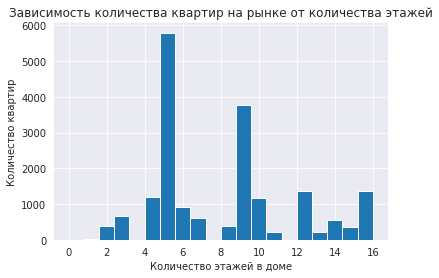

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['floors_total'], bins=20, range=(0,16))
plt.title('Зависимость количества квартир на рынке от количества этажей')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

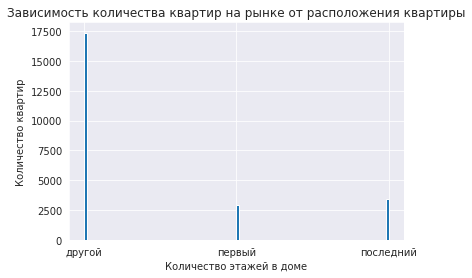

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['floor_type'], bins=100)
plt.title('Зависимость количества квартир на рынке от расположения квартиры')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим парки рядом
data['parks_nearest'].describe()

count    23699.000000
mean       167.315499
std        306.709997
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

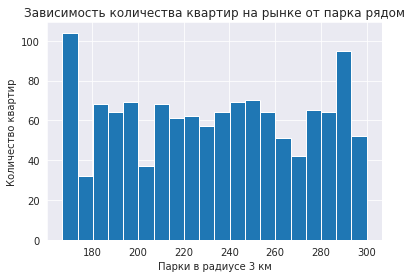

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['parks_nearest'], bins=20, range=(167,300))
plt.title('Зависимость количества квартир на рынке от парка рядом')
plt.xlabel('Парки в радиусе 3 км')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#изучим расстояние до центра
data['cityсenters_nearest_km'].describe()

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityсenters_nearest_km, dtype: float64

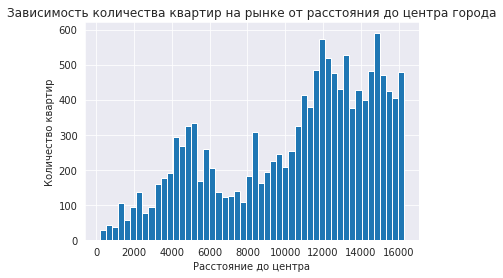

In [ ]:
sns.set_style("darkgrid")
plt.hist(data['cityсenters_nearest'], bins=50, range=(181,16293.000000))
plt.title('Зависимость количества квартир на рынке от расстояния до центра города')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество квартир')
plt.show()

Вывод

1.Больше всего квартир на рынке с площадью от 40 до 70 метров.

2.Больше всего объявлений о продже квартир с жилой площадь до 20кв.

3.Больше всего объявлений о продаже кваритр с маленькойй кухней - 6 квм.

4.Больше всего объявлений о продаже однокомнатных квартир. 

5.Квартиры с высотой потолков 2,6 м являются наболее часто встрчечающимеся. 

6.Меньше всего объявлений о продаже квартир на 1 этаже, в категории "на последнем этаже" - чутьбольше обявлений.

7.Больще всего предложний о продаже 5 этажках и 9этажках.

8 Больше всего предложний о продаже в спальных районах Санкт-Петербурга, 10 км от центра и дальше.

9.Расстояние до парка не зависит га частоту рахмещения объявлений.

10. Больше всего представленно квартир стоииомтью от 3 до 4,5 млн. 


#### check gap

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","21,796.00","21,421.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,20.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


#### checn nan

Работа с аномалиями 

In [ ]:
#Использовала метод межквартильного размаха для определения выбросов.

#

#for column in columns:
    #q_low = data[column].quantile(0.25)
    #q_hi = data[column].quantile(0.75)
    #q_range = q_hi - q_low
    #data = data[(data[column] < q_hi + 1.5 * q_range) & (data[column] > q_low - 1.5 * q_range)]
#     добавил код
    #print(column, data.shape)
    
    

In [ ]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","21,796.00","21,421.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,20.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [ ]:
#columns = ['rooms', 'total_area', 'ceiling_height', 'days_exposition',\
#'last_price', 'living_area', 'kitchen_area','floors_total']

In [ ]:
data.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [ ]:
data.total_area.value_counts().to_frame()

,total_area
45.00,419
42.00,383
60.00,347
31.00,346
44.00,345
...,...
44.24,1
56.85,1
37.92,1
115.60,1


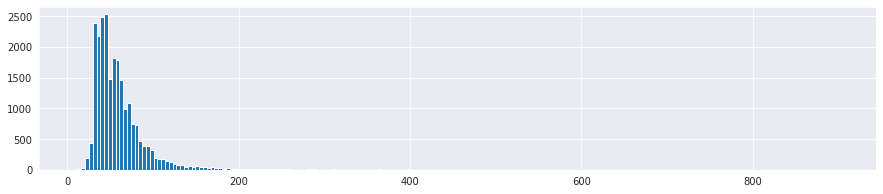

In [ ]:
data.total_area.hist(bins = 200, figsize = (15,3));

In [ ]:
data.ceiling_height.value_counts().to_frame()

,ceiling_height
2.65,9871
2.50,3522
2.60,1647
2.70,1582
3.00,1112
...,...
4.90,1
3.76,1
10.00,1
2.49,1


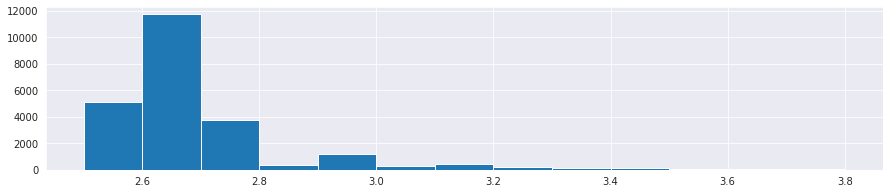

In [ ]:
data.ceiling_height.hist(bins = np.arange(2.5, 3.9, 0.1), figsize = (15,3));

In [ ]:
data.days_exposition.value_counts().to_frame()

,days_exposition
0,3181
45,880
60,538
7,234
30,208
...,...
1112,1
1080,1
1064,1
1032,1


<AxesSubplot:>

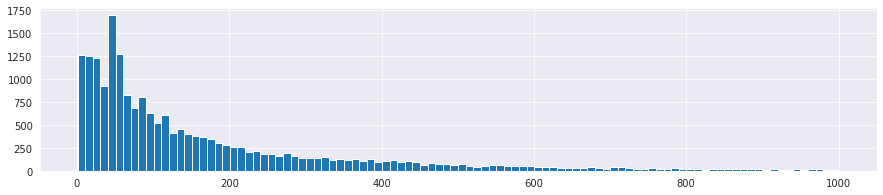

In [ ]:
data.days_exposition.hist(bins=100, figsize=(15,3), range=(1, 1000))

In [ ]:
data.last_price.value_counts().to_frame()

,last_price
4500000,342
3500000,291
4000000,260
4300000,260
4200000,259
...,...
1320000,1
19150000,1
6649000,1
10296437,1


<AxesSubplot:>

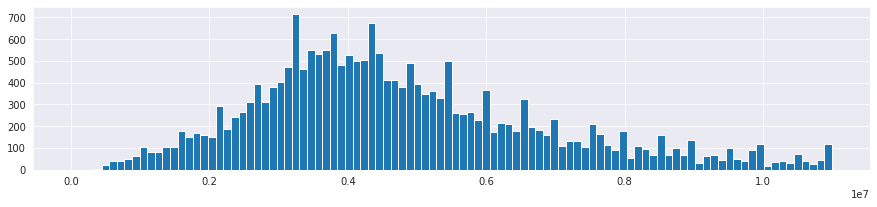

In [ ]:
data.last_price.hist(bins=100, figsize=(15,3), range=(1, 11000000))

In [ ]:
data.living_area.value_counts().to_frame()

,living_area
18.00,882
17.00,675
30.00,598
16.00,486
20.00,481
...,...
96.40,1
50.26,1
43.81,1
54.43,1


<AxesSubplot:>

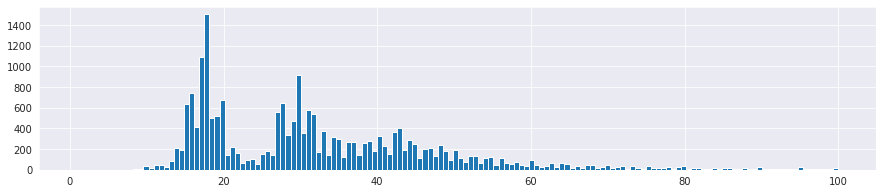

In [ ]:
data.living_area.hist(bins=150, figsize=(15,3), range=(1, 100))

<AxesSubplot:>

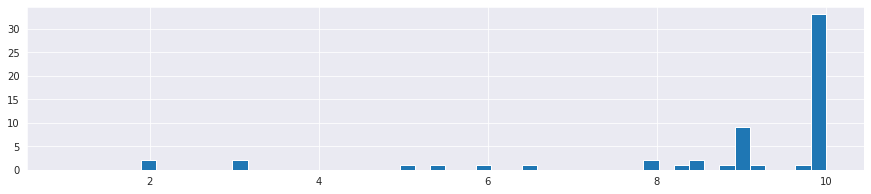

In [ ]:
data.living_area.hist(bins=50, figsize=(15,3), range=(1, 10))

In [ ]:
data.kitchen_area.value_counts().to_frame()

,kitchen_area
6.00,1300
10.00,1262
8.00,1110
9.00,1101
7.00,1062
...,...
7.12,1
13.73,1
14.74,1
53.10,1


<AxesSubplot:>

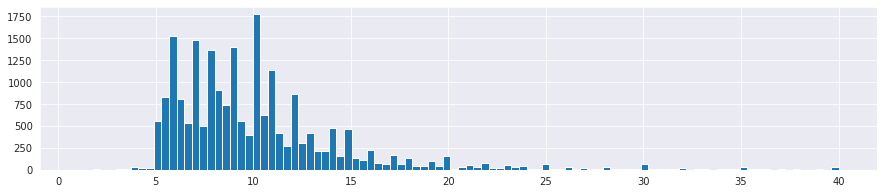

In [ ]:
data.kitchen_area.hist(bins=100, figsize=(15,3), range=(1, 40))

In [ ]:
data.floors_total.value_counts().to_frame()

,floors_total
5,5792
9,3766
16,1376
12,1368
4,1210
10,1177
25,1075
6,923
17,834
3,672


<AxesSubplot:>

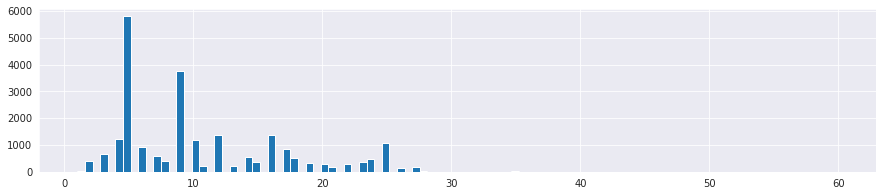

In [ ]:
data.floors_total.hist(bins=100, figsize=(15,3), range=(1, 60))

In [ ]:
# Определение порогов для каждого столбца на основе гистограмм выше
thresholds = {
    'rooms': (0, 9),              
    'total_area': (20, 200),      
    'ceiling_height': (2.0, 5.0), 
    'days_exposition': (1, 1200), 
    'last_price': (800000, 11000000),     
    'living_area': (8, 150),     
    'kitchen_area': (5, 25),      
    'floors_total': (1, 35)       
}

#### check clean

In [ ]:
def remove_outliers(data, thresholds):
    for col, (low, high) in thresholds.items():
        if col in ['days_exposition', 'living_area', 'kitchen_area']:
            data = data[(data[col] == 0) | (data[col].isna()) | ((data[col] >= low) & (data[col] <= high))]
        else:
            data = data[(data[col].isna()) | ((data[col] >= low) & (data[col] <= high))]
    return data

In [ ]:
# Удаление аномалий
cleaned_data = remove_outliers(data,thresholds)

In [ ]:
# check
cleaned_data.shape[0]

20959

#### check nan

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

In [ ]:
# check
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20959 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20959 non-null  int64         
 1   last_price              20959 non-null  int64         
 2   total_area              20959 non-null  float64       
 3   first_day_exposition    20959 non-null  datetime64[ns]
 4   rooms                   20959 non-null  int64         
 5   ceiling_height          20959 non-null  float64       
 6   floors_total            20959 non-null  int64         
 7   living_area             19341 non-null  float64       
 8   floor                   20959 non-null  int64         
 9   is_apartment            20959 non-null  bool          
 10  studio                  20959 non-null  bool          
 11  open_plan               20959 non-null  bool          
 12  kitchen_area            18967 non-null  float6

In [ ]:
# создал вторую часть переменной, чтобы показать эффект фильтрации
# thresholds_1 = {
     
#     'days_exposition': (1, 1200), 
       
#     'living_area': (10, 90),     
#     'kitchen_area': (5, 25),      
       
# }

In [ ]:
# Удаление аномалий
# cleaned_data = remove_outliers(data,thresholds_1)

In [ ]:
# check
cleaned_data.shape[0]

20959

In [ ]:

(
    cleaned_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,959.00","20,959.00","20,959.00","20,959.00","20,959.00","19,341.00","18,967.00","20,959.00","20,959.00"
min,0.00,20.00,2.00,0.00,"800,000.00",8.00,5.00,1.00,1.00
max,6.00,190.00,4.70,"1,200.00","11,000,000.00",112.00,25.00,33.00,35.00


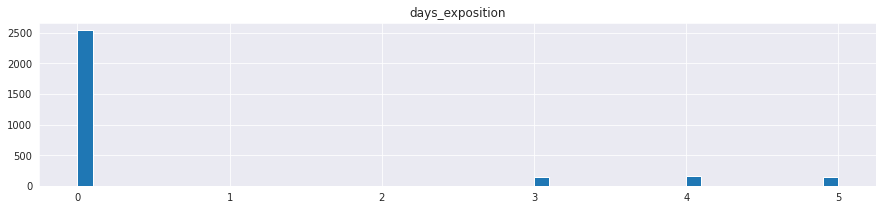

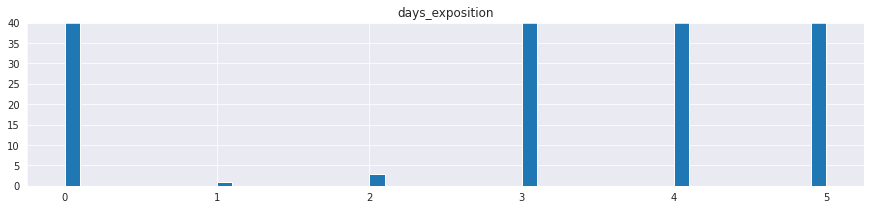

In [ ]:
# check
cleaned_data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

cleaned_data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [ ]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


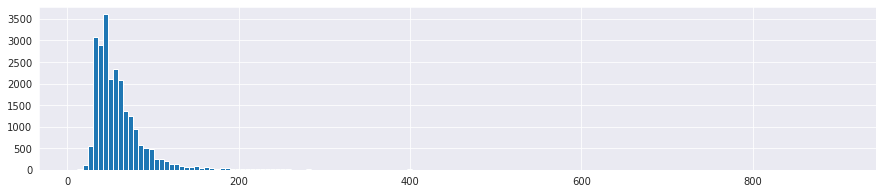

In [ ]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

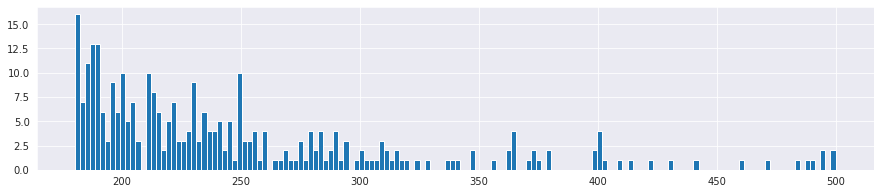

In [ ]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

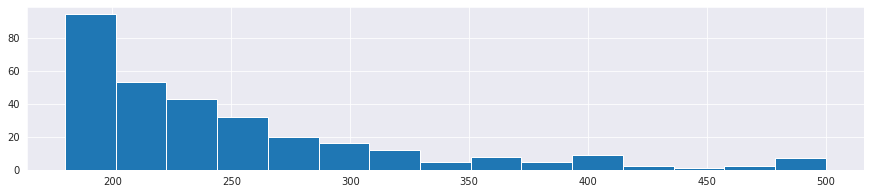

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

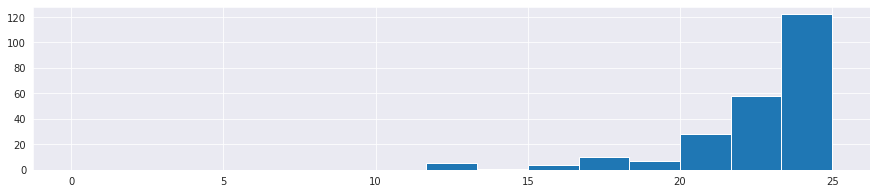

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,0.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,74.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.21,3.60,"1,043.04","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,380.00,4.45,"1,361.56","124,772,448.00",219.69,60.00,26.00,35.00


#### check

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

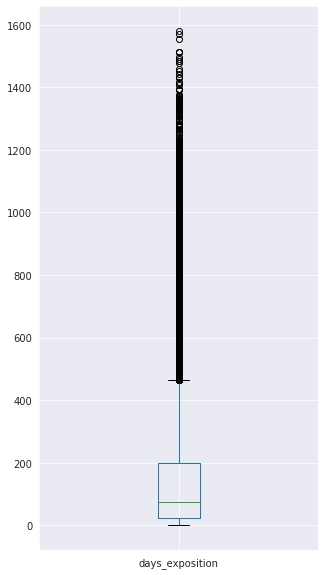

In [ ]:
data.boxplot('days_exposition', figsize=(5, 10))

data['days_exposition'].describe()

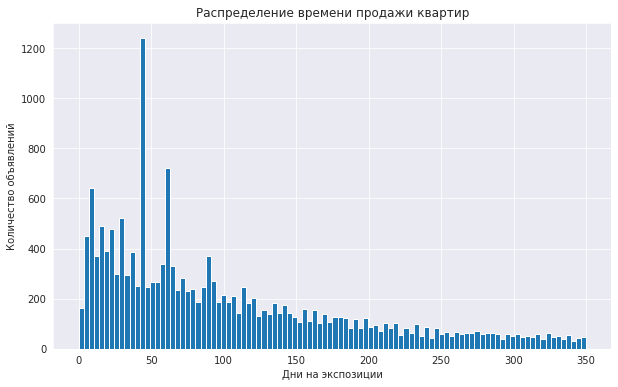

In [ ]:
# Построение гистограммы для столбца days_exposition
plt.figure(figsize=(10, 6))
data.query('0 < days_exposition < 350')['days_exposition'].hist(bins=100, range=(0, 350))
plt.title('Распределение времени продажи квартир')
plt.xlabel('Дни на экспозиции')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

In [ ]:
# Расчет среднего и медианы
mean_days_exposition = data['days_exposition'].mean()
median_days_exposition = data['days_exposition'].median()

print(f"Среднее время продажи: {mean_days_exposition:.2f} дней")
print(f"Медианное время продажи: {median_days_exposition} дней")

Среднее время продажи: 156.61 дней
Медианное время продажи: 74.0 дней


In [ ]:
Q1 = data['days_exposition'].quantile(0.25)
Q3 = data['days_exposition'].quantile(0.75)
print(f"25-й квартиль: {Q1} дней")
print(f"75-й квартиль: {Q3} дней")

25-й квартиль: 22.0 дней
75-й квартиль: 199.0 дней


In [ ]:
data_nonzero = data[data['days_exposition'] > 0]

mean_days_exposition = data_nonzero['days_exposition'].mean()
median_days_exposition = data_nonzero['days_exposition'].median()

print(f"Среднее время продажи: {mean_days_exposition:.2f} дней")
print(f"Медианное время продажи: {median_days_exposition} дней")

Среднее время продажи: 180.89 дней
Медианное время продажи: 95.0 дней


В среднем квартира продается за менее 100 дней, при этом медианное время продажи составляет 61 день. Быстрыми продажами можно считать продажи состоявшиеся за 22 дня, а необычно долгие предложеня о продаже квартиры(300 дней больше) могут и не состояться.

# example 1

#### example 3

##### example 4

#### 3. Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта.

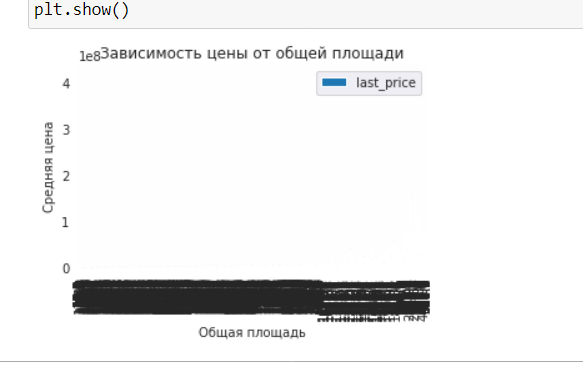        

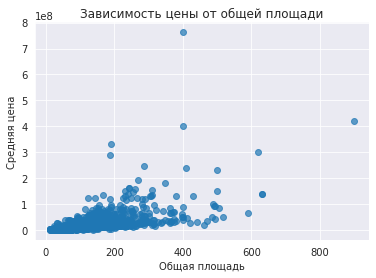

0.6536750579657242


In [ ]:
# Зависимость цены от общей площади
plt.scatter(data['total_area'], data['last_price'], alpha=0.7)
plt.xlabel('Общая площадь')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от общей площади')
plt.grid(True)
plt.show()
print(data['total_area'].corr(data['last_price'])) 

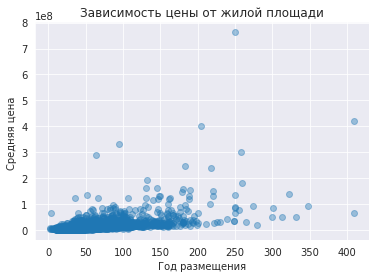

0.5664915336952651


In [ ]:
plt.scatter(data['living_area'], data['last_price'],alpha=0.4)
plt.xlabel('Год размещения')
plt.ylabel('Средняя цена ')
plt.title('Зависимость цены от жилой площади')
plt.grid(True)
plt.show()
print(data['living_area'].corr(data['last_price']))

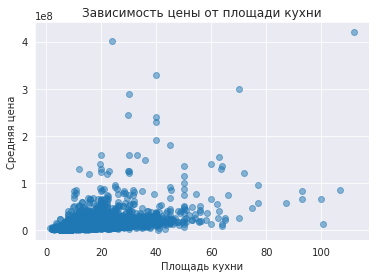

Коэффециент корреляции 0.5198690130216392


In [ ]:
# Зависимость цены от площади кухни
plt.scatter(data['kitchen_area'], data['last_price'],alpha=0.5)
plt.xlabel('Площадь кухни')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от площади кухни')
plt.grid(True)
plt.show()
print('Коэффециент корреляции', data['kitchen_area'].corr(data['last_price']))

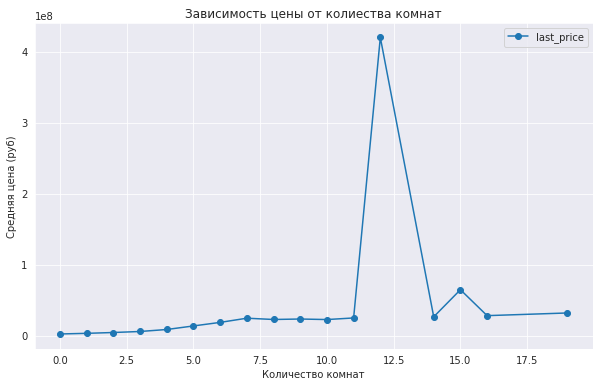

0.3633428499648948


In [ ]:
# Зависимость цены от количества комнат
pivot_floor_type = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
pivot_floor_type.plot(figsize=(10, 6), title='Зависимость цены от колиества комнат', style='o-')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()
print(data['rooms'].corr(data['last_price']))

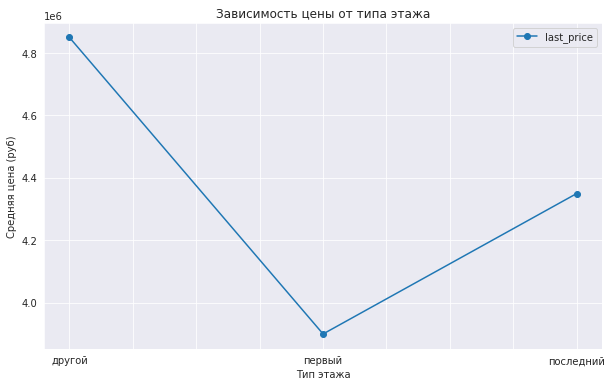

In [ ]:
# Зависимость цены от типа этажа
pivot_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
pivot_floor_type.plot(figsize=(10, 6), title='Зависимость цены от типа этажа', style='o-')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()


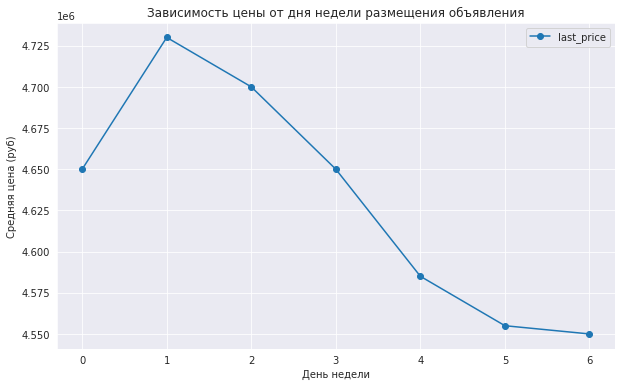

In [ ]:
# Зависимость цены от дня недели размещения объявления
pivot_day_of_week = data.pivot_table(index='day_of_week', values='last_price', aggfunc='median')
pivot_day_of_week.plot(figsize=(10, 6), title='Зависимость цены от дня недели размещения объявления', style='o-')
plt.xlabel('День недели')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()

In [ ]:
print(data['day_of_week'].corr(data['last_price']))

0.0015501452176215405


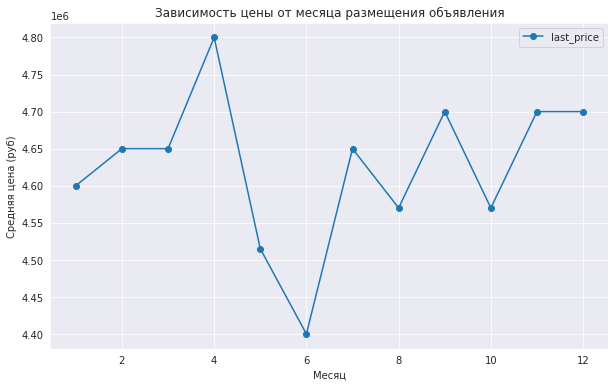

0.0027791287507397166


In [ ]:
# Зависимость цены от месяца размещения объявления
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
pivot_month.plot(figsize=(10, 6), title='Зависимость цены от месяца размещения объявления', style='o-')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()
print(data['month'].corr(data['last_price']))

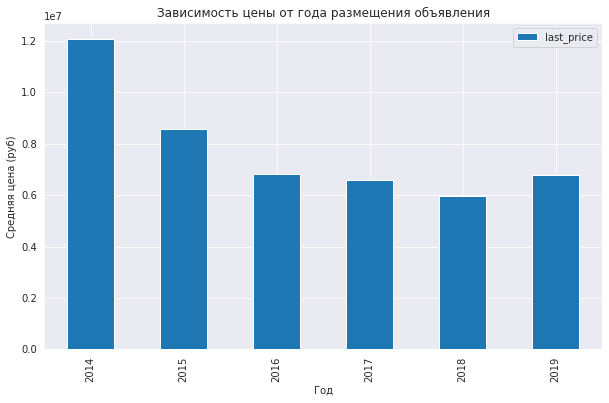

-0.043089036199508615


In [ ]:
# Зависимость цены от года размещения объявления
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc='mean')
pivot_year.plot(figsize=(10, 6), title='Зависимость цены от года размещения объявления', kind='bar')
plt.xlabel('Год')
plt.ylabel('Средняя цена (руб)')
plt.grid(True)
plt.show()
print(data['year'].corr(data['last_price']))

In [ ]:
pivot_table = data.pivot_table(index='year', values=['last_price', 'total_area','total_images'], aggfunc='median')
print(pivot_table)

      last_price  total_area  total_images
year                                      
2014     7700000       76.26             7
2015     5350000       60.00             7
2016     4550000       53.10             8
2017     4500000       52.00             9
2018     4550000       50.50            10
2019     5050000       52.00            11


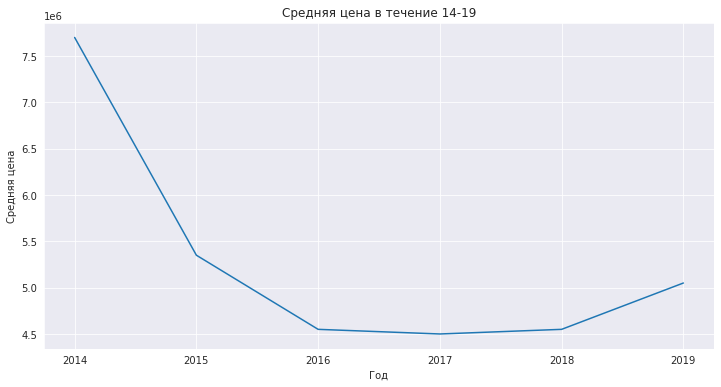

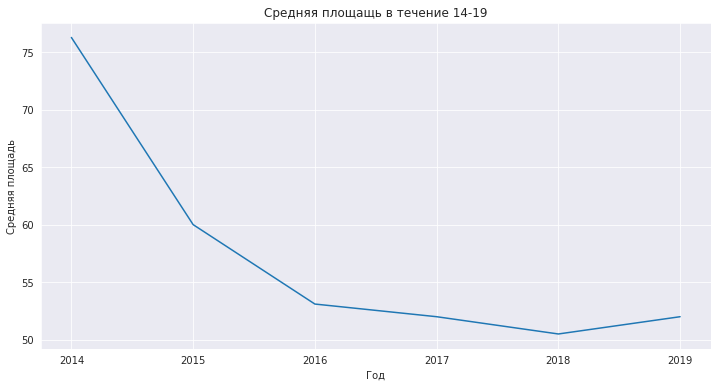

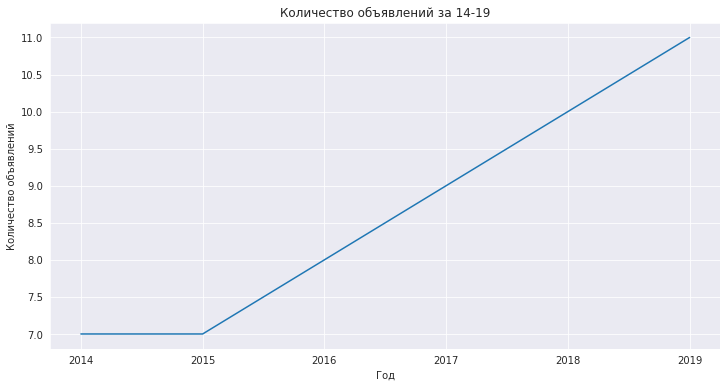

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(pivot_table.index, pivot_table['last_price'])
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена в течение 14-19')

plt.figure(figsize=(12,6))
plt.plot(pivot_table.index, pivot_table['total_area'])
plt.xlabel('Год')
plt.ylabel('Средняя площадь')
plt.title('Средняя площащь в течение 14-19')

plt.figure(figsize=(12,6))
plt.plot(pivot_table.index, pivot_table['total_images'])
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений за 14-19')

plt.show()

Вывод:



Высокая корреляция у общей площади и стоимости квартиры - чем больше площадь, тем выше цена. Количество комнат не так сильно влияет на стоимоть. Квартиры на первом этаже стоят меньше, чем на других.За 6 лет средняя площадь квартиры ументшилась, а вот цена начала расти. 

В летнией сезон наблюдается спад количества предложений на рынке. 
К 2016 году можно наблюдать снижение стоимости на недвижимость, но начиная с 2018 цена наинает снова расти. НАблюдается резкий обвал колчиства объявлений о продаже недвижмости в 2015, что,возможно, связно с кризисом тех лет. 


Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
# 10 населенных пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index

# Сводная таблица с количеством объявлений и средней ценой за квадратный метр
locality_pivot = data[data['locality_name'].isin(top_localities)].pivot_table(
    index='locality_name', 
    values='price_per_sqm', 
    aggfunc=['count','median']
).sort_values(('count', 'price_per_sqm'), ascending=False)

locality_pivot.columns = ['Количество объявлений', 'Средняя цена за квадратный метр']
print(locality_pivot)
# Населённый пункт с самой высокой стоимостью квадратного метра
max_price_locality = locality_pivot['Средняя цена за квадратный метр'].idxmax()
max_price = locality_pivot['Средняя цена за квадратный метр'].max()

# Населённый пункт с самой низкой стоимостью квадратного метра
min_price_locality = locality_pivot['Средняя цена за квадратный метр'].idxmin()
min_price = locality_pivot['Средняя цена за квадратный метр'].min()

print(f"Населённый пункт с самой высокой стоимостью квадратного метра: {max_price_locality} - {max_price:.2f} руб./кв.м")
print(f"Населённый пункт с самой низкой стоимостью квадратного метра: {min_price_locality} - {min_price:.2f} руб./кв.м")

                   Количество объявлений  Средняя цена за квадратный метр
locality_name                                                            
санкт-петербург                    15721                       104761.900
поселок мурино                       556                        85878.465
поселок шушары                       440                        76876.175
всеволожск                           398                        65789.470
пушкин                               369                       100000.000
колпино                              338                        74723.745
поселок парголово                    327                        91642.860
гатчина                              307                        67796.610
деревня кудрово                      299                        91860.470
выборг                               237                        58158.320
Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург - 104761.90 руб./кв.м
Населённый 

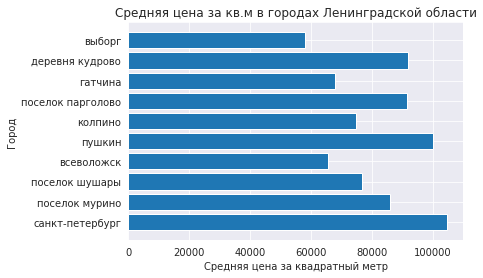

In [ ]:
fig, ax = plt.subplots()
ax.barh(locality_pivot.index, locality_pivot['Средняя цена за квадратный метр'])
ax.set_title('Средняя цена за кв.м в городах Ленинградской области')
ax.set_xlabel('Средняя цена за квадратный метр')
ax.set_ylabel('Город')
plt.show()

Дороже всего квартиры в Питере, так как это мегаполис. Дальше идет Мурино, высокая стоимость возможно от того,что населенный пункт надодится рядом с Питером. Дешевле всего квартиры стоят во Всеволожске и Гатчине.

Cредняя стоимость на разном удалении от центра.

In [ ]:
# Средняя стоимость квартир в Санкт-Петербурге в зависимости от расстояния до центра
spb_data = data[data['locality_name'] == 'санкт-петербург']
spb_avg_price_per_km = spb_data.groupby('cityсenters_nearest_km')['last_price'].median().reset_index()

# Переименование столбцов 
spb_avg_price_per_km.columns = ['Расстояние до центра (км)', 'Средняя цена (руб.)']

# Сортировка данных по расстоянию до центра
spb_avg_price_per_km = spb_avg_price_per_km.sort_values(by='Расстояние до центра (км)')


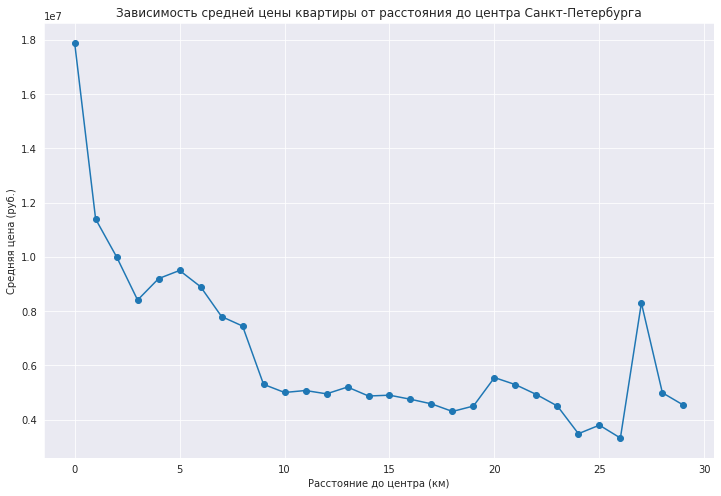

In [ ]:
# Построение графика зависимости средней цены от расстояния до центра
plt.figure(figsize=(12, 8))
plt.plot(spb_avg_price_per_km['Расстояние до центра (км)'], spb_avg_price_per_km
         ['Средняя цена (руб.)'], marker='o', linestyle='-')
plt.title('Зависимость средней цены квартиры от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб.)')
plt.grid(True)
plt.show()

Дороже всего квартиры в самом центре.График меняется в районе 8км, это и будет считаться центром Санкт-Петербурга.

In [ ]:
outlier_record = spb_data[spb_data['cityсenters_nearest_km'] == 27]
print(outlier_record)

      total_images  last_price  total_area first_day_exposition  rooms  \
748             13    14350000        74.0           2017-11-28      2   
5961             6     2250000        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
748             3.13             5         30.0      3         False  ...   
5961            2.65             2         16.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
748            1496               0.0            NaN              128   
5961              0               0.0            NaN              178   

     price_per_sqm  day_of_week  month  year  floor_type  \
748      193918.92            1     11  2017      другой   
5961      70312.50            1      2  2018   последний   

      cityсenters_nearest_km  
748                       27  
5961                      27  

[2 rows x 28 columns]


In [ ]:
data.query('3 <= cityсenters_nearest_km <= 5 and locality_name == "санкт-петербург"')\
    .groupby('cityсenters_nearest_km')['floor_type'].value_counts()

cityсenters_nearest_km  floor_type
3                       другой        214
                        последний      81
                        первый         55
4                       другой        494
                        последний     115
                        первый         79
5                       другой        689
                        последний     149
                        первый         82
Name: floor_type, dtype: int64

### Напишите общий вывод

Старый вывод: Изучили общую информацию о предоставленных данных. Изменили тип данных некоторых столбцов и заполнили пропущенных значения.
 Выполнили предобработку данных и добавили столбцы, содержащие информацию о цене квадратного метра, день публикации, месяц и год публикации. Добавлены столбцы с типом этажа и растоянием до центра. 
 
В рамках исследвательского анализа была получена следующая информация: 
Больше всего квартир на рынке с площадью от 40 до 70 метров, с маленькой кухней до 6 метров находящаяся в 5 или 9 этажке. Среднее время продажи квартиры составляет 156 дней.
На стоимость квартиры влияет ее площадь, расположение в доме(этаж) и расстояние до центра. 

Посчитана среднюю цена одного квадратного метра в 10 населённых пунктах Ленинградской области также вычислена средняя цена за квартиру на разном удалении от центра Сагкт_петербурга. 
 

Изучили общую информацию о предоставленных данных. Изменили тип данных некоторых столбцов и заполнили пропущенных значения.
Выполнили предобработку данных и добавили столбцы, содержащие информацию о цене квадратного метра, день публикации, месяц и год публикации. Добавлены столбцы с типом этажа и растоянием до центра. 
 
В рамках исследвательского анализа была получена следующая информация: 
Больше всего квартир на рынке с площадью от 40 до 70 метров, с маленькой кухней до 6 метров находящаяся в 5 или 9 этажке. 
Среднее время продажи квартиры составляет 100 дней, медианное - 61. 
На стоимость квартиры в большей степени влияет ее площадь, расположение в доме(этаж) и расстояние до центра. 

Посчитана среднюю цена одного квадратного метра в 10 населённых пунктах Ленинградской области также вычислена средняя цена за квартиру на разном удалении от центра Санкт-Петербурга. 

### Бонус

In [ ]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

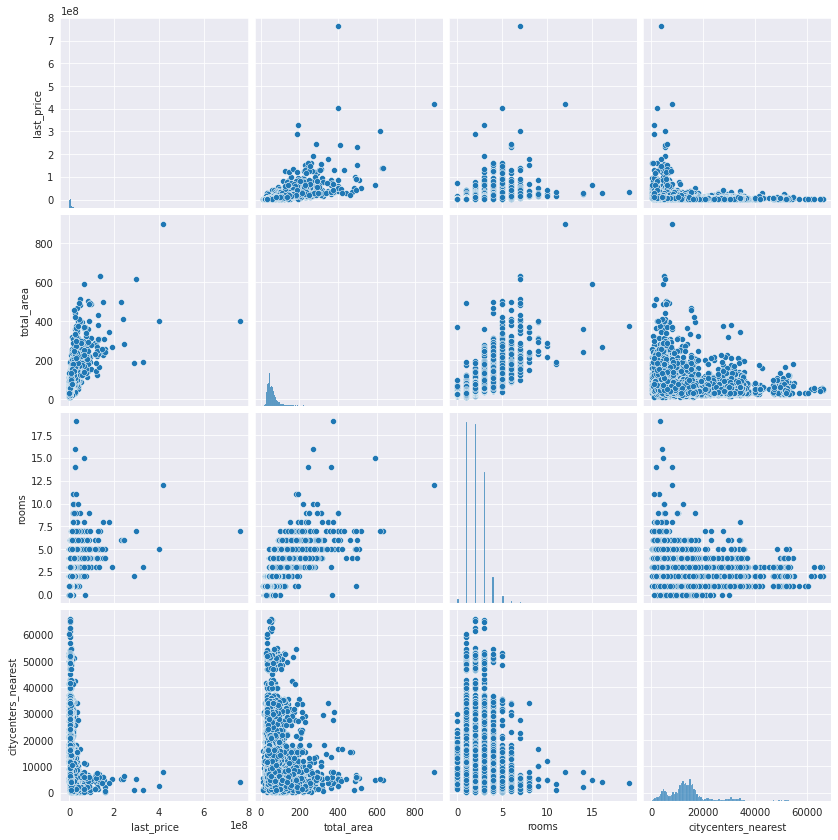

In [ ]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityсenters_nearest']])
plt.gcf().set_size_inches(12,12);


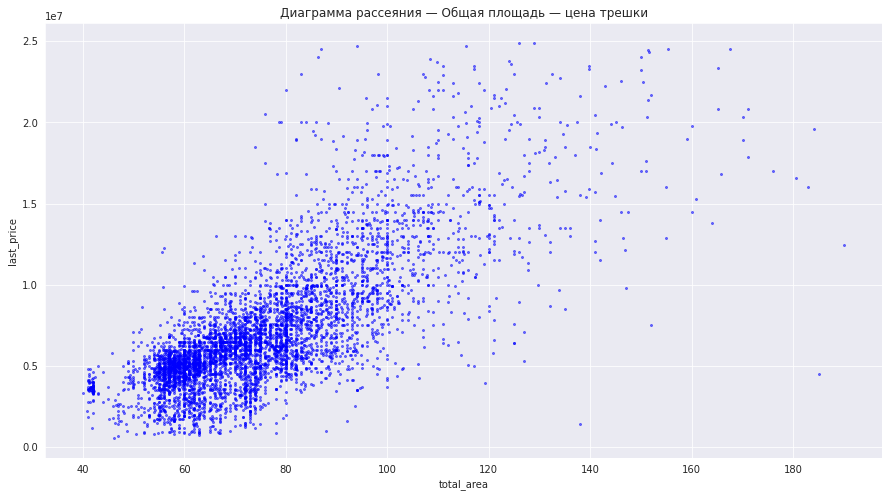

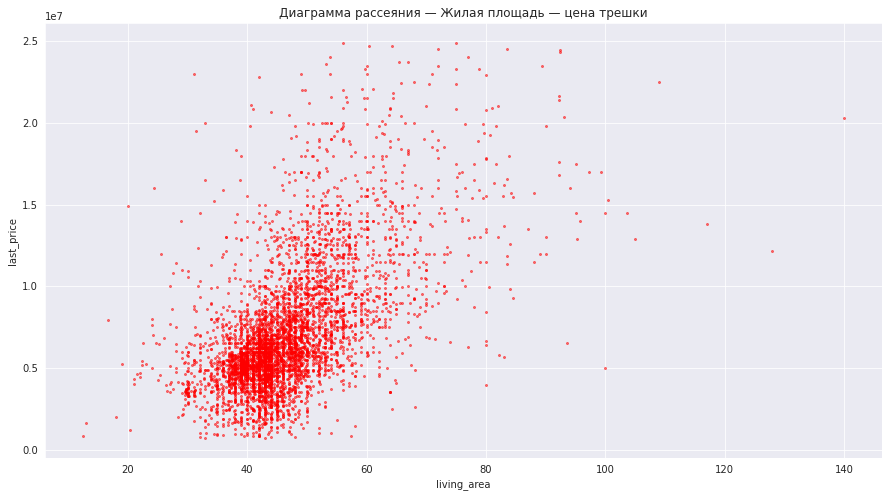

In [ ]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

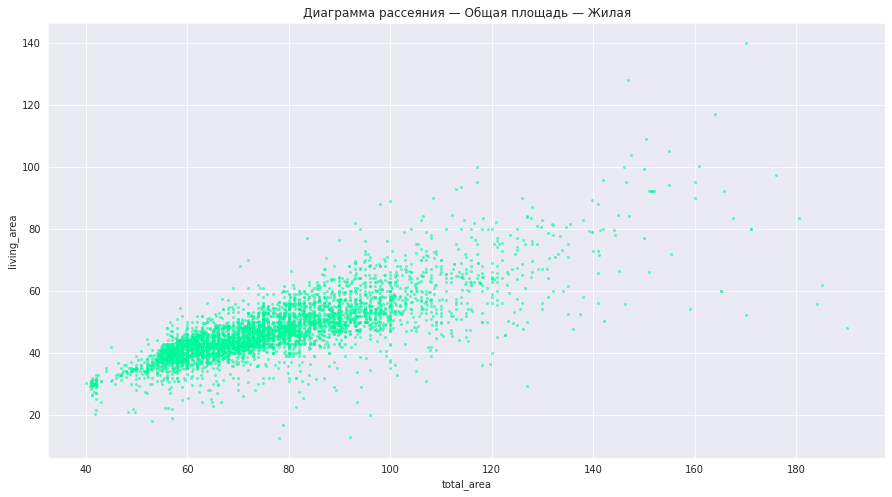

In [ ]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'MediumSpringGreen', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [ ]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают

,mean,count
locality_name,,
санкт-петербург,"8,062,507","15,721"
пушкин,"6,469,036",369
поселок парголово,"4,488,075",327
деревня кудрово,"4,234,158",299
поселок шушары,"4,108,082",440
колпино,"3,964,021",338
всеволожск,"3,789,068",398
поселок мурино,"3,652,361",556
гатчина,"3,488,337",307


In [ ]:
# check
try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
    
df_check.info()
df_isna = df_check.query('airports_nearest.isna() | airports_nearest < 60000')
df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check[(df_check ['airports_nearest'] < 60000) | (df_check ['airports_nearest'].isna()) ]

df_isna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

df_check = df_check[
    (
        (df_check['airports_nearest'] < 70000) | (df_check['airports_nearest'].isna())
    ) & 
    (
        (df_check['airports_nearest'] > 40000) | (df_check['airports_nearest'] < 30000) | (df_check[
            'airports_nearest'].isna())
    ) 
   ]

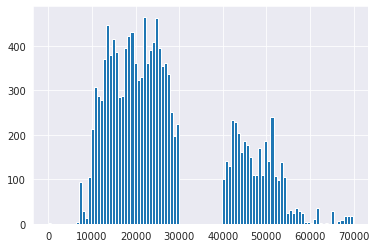

In [ ]:
df_check['airports_nearest'].hist(bins = 100);

In [ ]:
df_check = df_check.drop(df_check.query('15000 < airports_nearest < 22000').index)

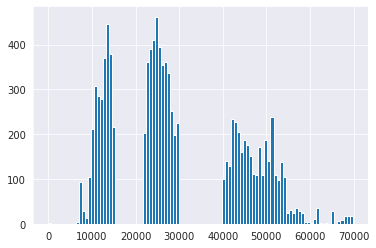

In [ ]:
df_check['airports_nearest'].hist(bins = 100);

In [ ]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15770 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          15770 non-null  int64  
 1   last_price            15770 non-null  float64
 2   total_area            15770 non-null  float64
 3   first_day_exposition  15770 non-null  object 
 4   rooms                 15770 non-null  int64  
 5   ceiling_height        9435 non-null   float64
 6   floors_total          15710 non-null  float64
 7   living_area           14442 non-null  float64
 8   floor                 15770 non-null  int64  
 9   is_apartment          1828 non-null   object 
 10  studio                15770 non-null  bool   
 11  open_plan             15770 non-null  bool   
 12  kitchen_area          14175 non-null  float64
 13  balcony               8063 non-null   float64
 14  locality_name         15735 non-null  object 
 15  airports_nearest   

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.